# Monte Carlo Tree Search In Action

### Upper Confidence Bound for MCTS

$$
U(s, a) = Q(s, a) + c_{puct} P(s, a) \frac{\sqrt{\sum_b N(s, b)}}{1 + N(s, a)}
$$

In [249]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [250]:
import numpy as np
from alphazero.gomoku_game import GomokuGame as Game
from alphazero.mcts import MCTS
from alphazero.gomoku_board import GomokuBoard

In [251]:
BOARD_SIZE=15

---
### The initial board

In [313]:
# Yixin says: This is a 100% win for white - I guess we're not quite there, yet...;-(
stones = "C11F9E9G8F7G7G9H8"
#stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"
stones = "H8G8"

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


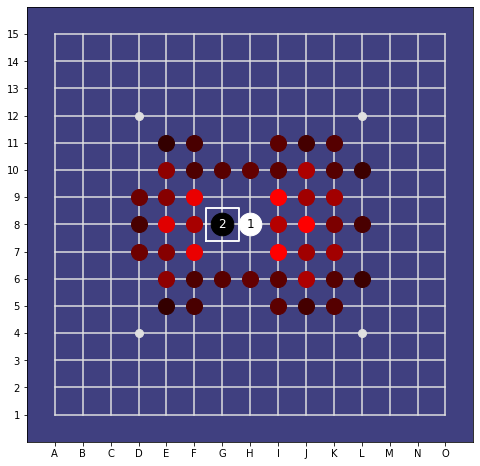

In [254]:
from domoku.policies.heuristic_policy import HeuristicPolicy
from domoku.board import GomokuBoard as LegacyBoard

policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones.replace(" ", ""), heuristics=policy)
board_t.display()

In [255]:
detector = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
the_game = Game(BOARD_SIZE, detector=detector, initial=stones)

brain_d = policy
mcts_d = MCTS(the_game, brain_d, cpuct=1.0, num_simulations=300, model_threshold=.3)

brain_c = policy
mcts_c = MCTS(the_game, brain_c, cpuct=1.0, num_simulations=100, model_threshold=.4)

board = the_game.get_initial_board()
Move=board.Stone

colors = ['Black', 'White']

In [256]:
for i in range(30):

    # weaker and loose challenger
    #
    probs = mcts_c.get_action_prob(board, temperature=1)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)
    if mcts_d.game.get_game_ended(board):
        print(board.stones)
        print("Black wins")
        break

    # Stronger and tight defender
    #
    probs = mcts_d.get_action_prob(board, temperature=0)
    # print(f"Advisable: {[Move(m) for m in brain_d.get_advisable_actions(board.math_rep)]}")
    move = Move(np.random.choice(225, p=probs))
    # print(f"{colors[board.get_current_player()]}: {move}")
    board.act(move)

    print(board.stones)

    if mcts_d.game.get_game_ended(board):
        print("White wins")
        break


[H8, G8, I11, I10]
[H8, G8, I11, I10, F7, G7]
[H8, G8, I11, I10, F7, G7, G6, H5]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4, G11, E9]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4, G11, E9, F8, F9]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4, G11, E9, F8, F9, D9, H7]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4, G11, E9, F8, F9, D9, H7, E10, J5]
[H8, G8, I11, I10, F7, G7, G6, H5, H12, K9, F14, G13, E6, H6, J4, F4, I7, G9, H4, K4, G11, E9, F

In [257]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  X  .  .  .  O  .  .  .  .  .    
13    .  .  .  .  .  .  O  .  X  .  .  .  .  .  .    
12    .  .  .  .  .  .  O  X  .  .  X  .  .  .  .    
11    .  .  .  .  .  O  X  .  X  O  .  .  .  .  .    
10    .  .  .  .  X  .  .  .  O  .  .  .  .  .  .    
 9    .  .  .  X  O  O  O  O  X  .  O  .  .  .  .    
 8    .  .  X  .  .  X  O  X  .  .  .  .  .  .  .    
 7    .  X  .  O  .  X  O  O  X  .  .  .  .  .  .    
 6   [X] .  .  .  X  .  X  O  X  .  .  .  .  .  .    
 5    .  .  .  .  .  X  O  O  O  O  X  .  .  .  .    
 4    .  .  .  .  .  O  .  X  .  X  O  .  .  .  .    
 3    .  .  .  .  O  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  X  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


---

## Reviewing the game on the way back

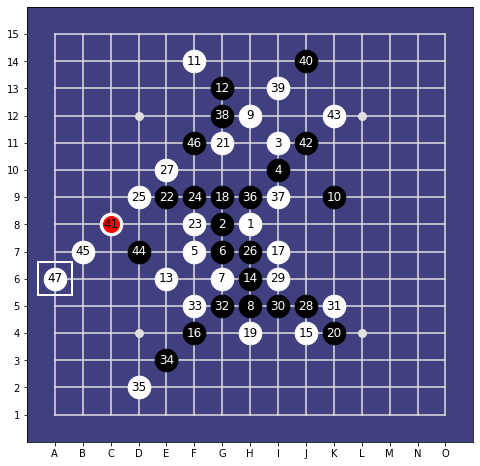

In [302]:
stones = "".join([str(stone) for stone in board.stones])
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones, heuristics=policy)
board_t.display()

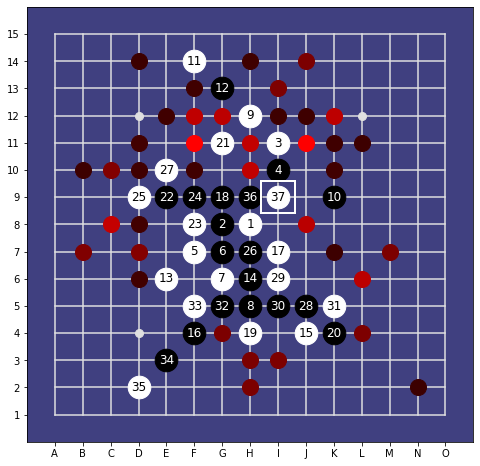

In [312]:
board_t.bwd().display()